In [13]:
import pandas as pd
import random


In [14]:
df = pd.read_csv("creditcard.csv")
print("Original shape:", df.shape)
df.head()


Original shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Step 2: Add dummy categorical columns with random realistic values
df["Operator"] = random.choices(["JazzCash", "EasyPaisa", "SadaPay"], k=len(df))
df["Region"] = random.choices(["Punjab", "Sindh", "KPK", "Balochistan"], k=len(df))
df["Txn_Type"] = random.choices(["Send Money", "Bill Payment", "Mobile Load", "Bank Transfer"], k=len(df))

# Step 3: Save as new CSV for your readable dataset
df.to_csv("wallet_fraud_readable.csv", index=False)

print("Readable dataset with dummy columns created: wallet_fraud_readable.csv")
print(df[["Operator", "Region", "Txn_Type"]].head())

Readable dataset with dummy columns created: wallet_fraud_readable.csv
    Operator  Region      Txn_Type
0    SadaPay   Sindh   Mobile Load
1   JazzCash     KPK  Bill Payment
2  EasyPaisa     KPK  Bill Payment
3  EasyPaisa     KPK  Bill Payment
4  EasyPaisa  Punjab   Mobile Load


Dataset shape: (284807, 34)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.

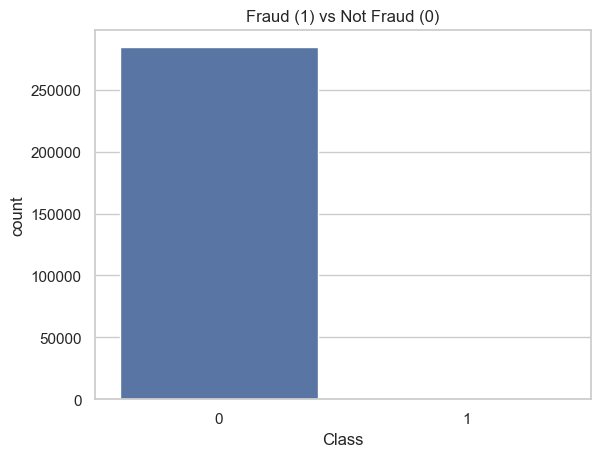

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the readable dataset
df = pd.read_csv("wallet_fraud_readable.csv")

# Basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nClass distribution:")
print(df['Class'].value_counts())

# Visualize Class imbalance
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Not Fraud (0)")
plt.show()



Transactions by Operator:
Operator
EasyPaisa    95630
JazzCash     94670
SadaPay      94507
Name: count, dtype: int64


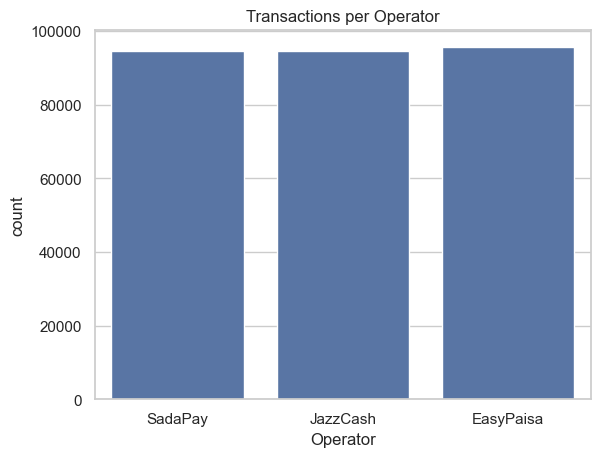


Transactions by Region:
Region
Balochistan    71445
Punjab         71395
KPK            70999
Sindh          70968
Name: count, dtype: int64


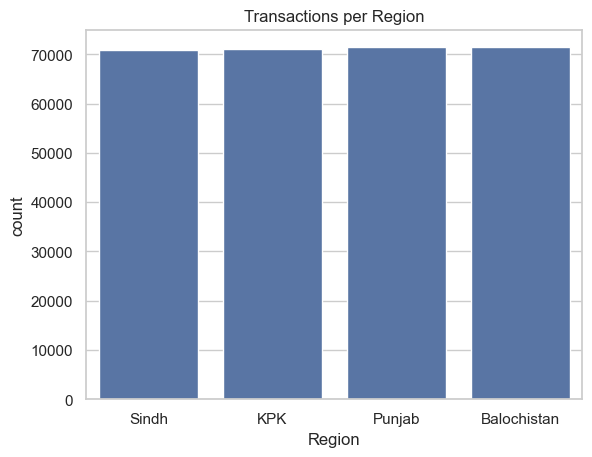


Transactions by Txn_Type:
Txn_Type
Send Money       71360
Mobile Load      71346
Bank Transfer    71069
Bill Payment     71032
Name: count, dtype: int64


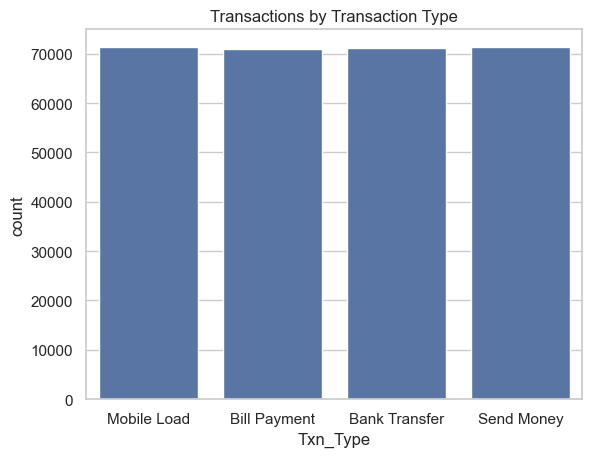

In [21]:
# Count of transactions per Operator
print("\nTransactions by Operator:")
print(df['Operator'].value_counts())

sns.countplot(x='Operator', data=df)
plt.title("Transactions per Operator")
plt.show()

# Count of transactions per Region
print("\nTransactions by Region:")
print(df['Region'].value_counts())

sns.countplot(x='Region', data=df)
plt.title("Transactions per Region")
plt.show()

# Count of transactions per Txn_Type
print("\nTransactions by Txn_Type:")
print(df['Txn_Type'].value_counts())

sns.countplot(x='Txn_Type', data=df)
plt.title("Transactions by Transaction Type")
plt.show()


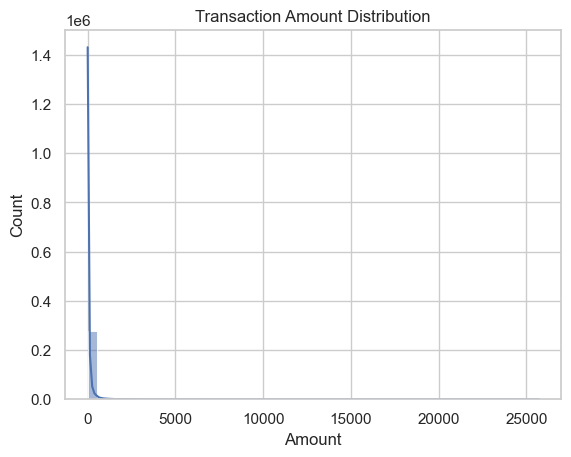

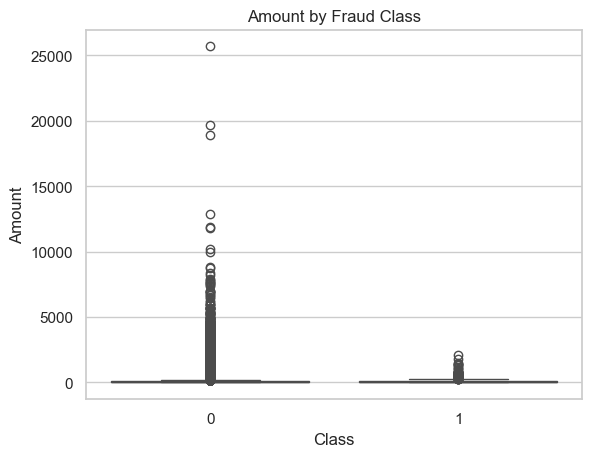

In [22]:
# Distribution of Amount
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Amount distribution per Class (Fraud/Not Fraud)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Fraud Class")
plt.show()


In [24]:

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['Operator', 'Region', 'Txn_Type'], drop_first=True)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

print("Sample encoded data:")
print(X_encoded.head())

X_encoded.to_csv("X_encoded.csv", index=False)
y.to_csv("y.csv", index=False)



Shape before encoding: (284807, 33)
Shape after encoding: (284807, 38)
Sample encoded data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V28  Amount  Operator_JazzCash  \
0  0.098698  0.363787  ... -0.021053  149.62              False   
1  0.085102 -0.255425  ...  0.014724    2.69               True   
2  0.247676 -1.514654  ... -0.059752  378.66              False   
3  0.377436 -1.387024  ...  0.061458  123.50              False   
4 -0.270533  0.817739  ...  0.215153   69.99              False   

   Operator_SadaPa